## Random Forest Model - MA

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd

In [2]:
data_file = "./final_data/All Companies 20100101 To 20201231 M and A Baseline 8 Variables v2.csv"
data_file = "./final_data/All Companies 20100101 To 20201231 M and A Baseline 10 Variables v2.csv"

In [3]:
# Variables

Y_column  = "Acquired"
#non_data_cols = ['Acquired','Year of acquisition']
non_data_cols = ['Acquired']

In [4]:
data = pd.read_csv(data_file)
data.head(2)

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,10-Dec,10-Dec.1,10-Dec.2,10-Dec.3,10-Dec.4,10-Dec.5,10-Dec.6,10-Dec.7,10-Dec.8,...,20-Dec.3,20-Dec.4,20-Dec.5,20-Dec.6,20-Dec.7,20-Dec.8,20-Dec.9,Acquired,Acquisition type,Acquisition year
0,Company Name,Sales,Net Loans To Assets,Profit Margin,Free Cash Flow Return,ROE,Return on capital employed,Total assets,Quick ratio (times),Current ratio (times),...,Free Cash Flow Return,ROE,Return on capital employed,Total assets,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),NaN,NaN,NaN
1,'X'Clusive Business Centre Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN


In [5]:
def preprocess_col_header(df):
    col_1 = df.columns
    col_1 = [item.split('-')[0] for item in col_1]
    col_1 = [f"20{item}" for item in col_1]

    col_2 = df.iloc[0].values
    col_2 = ["" if str(item) =='nan' else item for item in col_2]
    
    cols = []
    for a,b in zip(col_1, col_2):
        cols.append(f"{a}-{b}")
    
    cols[0] = 'Company Name'
    cols[-3]= 'Acquired'
    cols[-2] = 'Acquisition Type'
    cols[-1] = 'Acquisition Year'
    df.columns = cols
    df = df[1:]
    return df

In [6]:
data = preprocess_col_header(data)
data.head()

,Company Name,2010-Sales,2010-Net Loans To Assets,2010-Profit Margin,2010-Free Cash Flow Return,2010-ROE,2010-Return on capital employed,2010-Total assets,2010-Quick ratio (times),2010-Current ratio (times),...,2020-Free Cash Flow Return,2020-ROE,2020-Return on capital employed,2020-Total assets,2020-Quick ratio (times),2020-Current ratio (times),2020-Debt to equity ratio (times),Acquired,Acquisition Type,Acquisition Year
1,'X'Clusive Business Centre Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
2,20Th Century Finance Corpn. Ltd. [Merged],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
3,20Th Century Gems Ltd.,2.2,0.33,72.97,0,13.81,12.71,23.6,1.3,1.3,...,0,11.67,11.31,58.8,5.67,5.67,0.03,No,NaN,NaN
4,20Th Century Holdings Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1.27,1.19,246.5,16,1158,0,No,NaN,NaN
5,20Th Century Trdg. Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-3.39,-3.39,2.9,NaN,NaN,0,No,NaN,NaN


In [7]:
print(f"Total companies : {data.shape[0]}")
print(f"Companies that have all data for all years : {data.dropna().shape[0]}")

Total companies : 11019
Companies that have all data for all years : 2


In [8]:
print(f"Total Acquired companies in the dataset : {data[data[Y_column]=='Yes'].shape[0]}")

Total Acquired companies in the dataset : 913


In [9]:
year_count = {}
year_cols = {}
cols = data.columns
for year in range(2010, 2021):
    year_count[f"{year}-"] = 0
    year_cols[f"{year}-"] = []
    for col in data.columns:
        if f"{year}-" in col:
            year_count[f"{year}-"] +=1
            year_cols[f"{year}-"].append(col)

print(year_count)

{'2010-': 10, '2011-': 10, '2012-': 10, '2013-': 10, '2014-': 10, '2015-': 10, '2016-': 10, '2017-': 10, '2018-': 10, '2019-': 10, '2020-': 10}


In [10]:
dims = year_cols["2015-"]
dims = [dim.replace("2015-","") for dim in dims]
dims

['Sales',
 'Net Loans To Assets',
 'Profit Margin',
 'Free Cash Flow Return',
 'ROE',
 'Return on capital employed',
 'Total assets',
 'Quick ratio (times)',
 'Current ratio (times)',
 'Debt to equity ratio (times)']

In [11]:
selected_dims = ['Sales',
 'Net Loans To Assets',
 'Profit Margin',
 'Free Cash Flow Return',
 'ROE',
 'Total assets',
 'Current ratio (times)',
 'Debt to equity ratio (times)']

In [12]:
df_ma = data[data['Acquired']=='Yes']
df_ma.shape

(913, 114)

In [13]:
row_null = df_ma.isnull().sum(axis=1).tolist()
df_ma['null_count'] = row_null
print(df_ma[df_ma['null_count']==0].shape)
dfma = df_ma[df_ma['null_count']<90]
print(dfma.shape)

(2, 115)
(595, 115)


/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Not Acquired
df_non_ma = data[data['Acquired']=='No']
print(df_non_ma.shape)
row_null = df_non_ma.isnull().sum(axis=1).tolist()
df_non_ma['null_count'] = row_null
dfnonma = df_non_ma[df_non_ma['null_count']<12]
print(dfnonma.shape)

(10101, 114)
(843, 115)


/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
dfnonma.shape

(843, 115)

In [16]:
dfma.shape

(595, 115)

In [17]:
df = pd.concat([dfnonma, dfma])
df = df.sort_values(['Company Name']).reset_index(drop=True)
df.head()
#df.to_csv("RF_Train_Test_var8.csv")
df.to_csv("RF_Train_Test_var10.csv")

In [18]:
# Feature Extraction
features_df = pd.DataFrame()
for dim in selected_dims:
    cols = [f"{str(year)}-{dim}" for year in range(2010, 2021)]
    df_dim = df[cols]
    df_dim = df_dim.astype(float)
    features_df[f"{dim}__max"] = df_dim.max(axis=1)
    features_df[f"{dim}__min"] = df_dim.min(axis=1)
    features_df[f"{dim}__variance"] = df_dim.var(axis=1)
    features_df[f"{dim}__std"] = df_dim.std(axis=1)
    features_df[f"{dim}__sum"] = df_dim.sum(axis=1)
    features_df[f"{dim}__mean"] = df_dim.mean(axis=1)
    
features_df['Acquired'] = pd.Categorical(df['Acquired']).codes
#features_df['Company Name'] = df['Company Name']

In [19]:
#features_df.fillna(0, inplace=True)
features_df = features_df.apply(lambda x: x.fillna(x.mean()), axis=0)
features_df = features_df.dropna()
features_df

,Sales__max,Sales__min,Sales__variance,Sales__std,Sales__sum,Sales__mean,Net Loans To Assets__max,Net Loans To Assets__min,Net Loans To Assets__variance,Net Loans To Assets__std,...,Current ratio (times)__std,Current ratio (times)__sum,Current ratio (times)__mean,Debt to equity ratio (times)__max,Debt to equity ratio (times)__min,Debt to equity ratio (times)__variance,Debt to equity ratio (times)__std,Debt to equity ratio (times)__sum,Debt to equity ratio (times)__mean,Acquired
0,1039.354331,181.753911,1.092654e+07,370.233328,0.0,505.003364,0.98,0.69,0.022900,0.151327,...,0.128938,0.31,0.077500,3.00,2.07,0.432450,0.657609,5.07,2.535000,1
1,468.900000,7.300000,3.126550e+04,176.820543,2571.0,257.100000,0.22,0.10,0.001271,0.035653,...,0.433129,5.53,0.553000,65.72,65.72,180038.286900,22.150151,65.72,65.720000,1
2,1633.000000,17.800000,4.321848e+05,657.407625,4017.4,502.175000,0.65,0.17,0.028196,0.167918,...,0.175401,7.77,0.706364,14.30,0.00,29.877745,5.466054,53.75,4.886364,0
3,27.500000,6.900000,7.344917e+01,8.570249,71.1,17.775000,0.44,0.00,0.027161,0.164806,...,186.005183,667.07,74.118889,0.05,0.00,0.000394,0.019861,0.11,0.012222,1
4,1063.000000,672.700000,4.796206e+04,219.002428,2431.4,810.466667,0.47,0.30,0.007433,0.086217,...,0.672681,5.40,1.800000,0.95,0.10,0.222633,0.471840,1.22,0.406667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1279.800000,1000.300000,1.837288e+04,135.546582,4473.5,1118.375000,0.61,0.17,0.029184,0.170833,...,0.816105,10.27,1.283750,1.33,0.00,0.293070,0.541359,1.35,0.225000,1
1434,0.300000,0.200000,3.333333e-03,0.057735,1.0,0.250000,0.11,0.05,0.000520,0.022804,...,0.200472,18.60,1.690909,0.08,0.00,0.000822,0.028667,0.14,0.012727,0
1435,4.300000,2.900000,2.427273e-01,0.492674,37.9,3.445455,0.11,0.00,0.001269,0.035624,...,11.788125,84.07,7.642727,1.09,0.00,0.205047,0.452821,6.98,0.634545,0
1436,1039.354331,181.753911,1.092654e+07,370.233328,0.0,505.003364,0.96,0.83,0.004867,0.069761,...,0.000000,12.00,6.000000,0.04,0.00,0.000400,0.020000,0.04,0.010000,1


In [20]:
X = features_df.drop(columns=['Acquired'])
X_train, X_test, y_train, y_test = train_test_split(X, features_df['Acquired'], random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 48) (360, 48) (1078,) (360,)


In [21]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8611111111111112

In [22]:
feature_importances = {}
for feature, value in zip(features_df.columns, rf.feature_importances_):
    feature = feature.split("__")[0]
    if feature in feature_importances:
        val_list = feature_importances[feature]
    else:
        val_list = []
    val_list.append(np.round(value,4))
    feature_importances[feature] = val_list

In [23]:
for key in feature_importances.keys():
    print(key, np.sum(feature_importances[key]))

Sales 0.3712
Net Loans To Assets 0.09739999999999999
Profit Margin 0.07569999999999999
Free Cash Flow Return 0.09509999999999999
ROE 0.10319999999999999
Total assets 0.09849999999999999
Current ratio (times) 0.1056
Debt to equity ratio (times) 0.0533


In [24]:
test_probs = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)
for prob, pred, actual in zip(test_probs, y_pred, y_test):
    print(prob, pred, actual)

[0.92 0.08] 0 0
[0.81 0.19] 0 0
[0.8 0.2] 0 0
[0.76 0.24] 0 0
[0.89 0.11] 0 0
[0.82 0.18] 0 0
[0.89 0.11] 0 0
[0. 1.] 1 1
[0.74 0.26] 0 0
[0.44 0.56] 1 0
[0.94 0.06] 0 0
[0.27 0.73] 1 1
[0.68 0.32] 0 0
[1. 0.] 0 0
[0.78 0.22] 0 0
[0.76 0.24] 0 1
[0.97 0.03] 0 0
[0.99 0.01] 0 0
[0.42 0.58] 1 1
[0.17 0.83] 1 1
[0.78 0.22] 0 0
[0.53 0.47] 0 0
[0.66 0.34] 0 0
[0.88 0.12] 0 0
[0.68 0.32] 0 0
[0.54 0.46] 0 1
[0.91 0.09] 0 0
[0.83 0.17] 0 0
[0.89 0.11] 0 0
[0.71 0.29] 0 0
[0.11 0.89] 1 1
[0.69 0.31] 0 0
[0.03 0.97] 1 1
[0.73 0.27] 0 0
[0.01 0.99] 1 1
[0. 1.] 1 1
[0.01 0.99] 1 1
[0.98 0.02] 0 0
[0. 1.] 1 1
[0.21 0.79] 1 1
[0.94 0.06] 0 0
[0.75 0.25] 0 0
[0.73 0.27] 0 0
[0.61 0.39] 0 0
[0.8 0.2] 0 1
[0.97 0.03] 0 0
[0.73 0.27] 0 1
[0.58 0.42] 0 0
[0. 1.] 1 1
[0.25 0.75] 1 1
[0.77 0.23] 0 0
[0.77 0.23] 0 0
[0.02 0.98] 1 1
[0.97 0.03] 0 0
[0.24 0.76] 1 1
[0.34 0.66] 1 1
[0.7 0.3] 0 0
[0.5 0.5] 0 0
[0.99 0.01] 0 0
[0.88 0.12] 0 0
[0.17 0.83] 1 1
[0.02 0.98] 1 1
[0.86 0.14] 0 0
[0.95 0.05] 0 0
[0.0

In [25]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred)

array([[202,   5],
       [ 45, 108]])

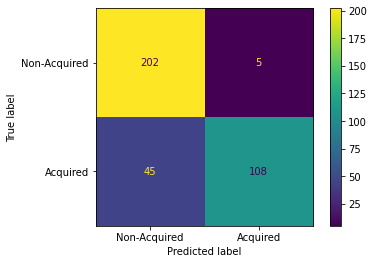

In [26]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Non-Acquired','Acquired'])

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall : {recall_score(y_test, y_pred)}")
print(f"F1 : {f1_score(y_test, y_pred)}")
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Precision : 0.9557522123893806
Recall : 0.7058823529411765
F1 : 0.81203007518797
Accuracy : 0.8611111111111112


In [28]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,7), dpi=1000)
tree.plot_tree(rf.estimators_[5],
               feature_names = features_df.columns, 
               class_names=["Non Acquired","Acquired"],
               max_depth=2,
               fontsize=7,
               filled = True);